<a href="https://colab.research.google.com/github/Ayaaba-Fatawu-Sumaila/cnn_model/blob/main/digit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Training a CNN model for digits prediction

In [1]:
!pip install -q kaggle #Installing kaggle into colab

In [2]:
from google.colab import files
files.upload() #Uploading the kaggle file dowloaded

Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"rubyfath","key":"a8d7026282c892652889641d82f2c4c2"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
import kagglehub

# Download latest version and load the data into path using the file path
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [5]:
#Splitting the data into training and testing datasets
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Training Shape {X_train.shape}")
print(f"Testing Shape {X_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Shape (60000, 28, 28)
Testing Shape (10000, 28, 28)


In [6]:
#Normalizing or scaling the images in order to work with and manipulate for training
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
#
print(f"Training Shape {X_train.shape}")
print(f"Testing Shape {X_test.shape}")

Training Shape (60000, 28, 28, 1)
Testing Shape (10000, 28, 28, 1)


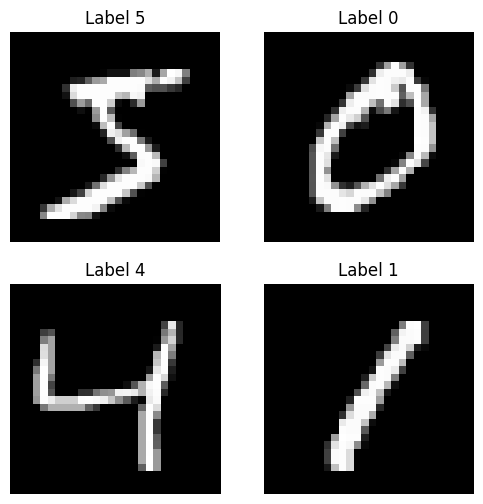

In [61]:
#Checking for the first 4 images in the training dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.title(f"Label {y_train[i]}")
    plt.axis('off')
plt.show()


In [8]:
#Importing neccessary libraries for model preprocessing and training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
#Building a sequential CNN model for predicting the numerical images
model = Sequential(
    [
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
        ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#Generating more images by adjusting the position and appearance of the image
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


In [11]:
#Compiling the model using adam optimizer, loss function and accuracy metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Create early stopping to stop the training when the model reach a certain threshold by having the same performance
early_stop=tf.keras.callbacks.EarlyStopping(
    patience=3,
    min_delta=0.001,
    restore_best_weights=True,
    monitor='val_loss',
    mode='min'
    )

In [13]:
#Training the model
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 46ms/step - accuracy: 0.6091 - loss: 1.1192 - val_accuracy: 0.9391 - val_loss: 0.1965
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 135s 43ms/step - accuracy: 0.8909 - loss: 0.3506 - val_accuracy: 0.9523 - val_loss: 0.1513
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.9249 - loss: 0.2585 - val_accuracy: 0.9642 - val_loss: 0.1037
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9329 - loss: 0.2179 - val_accuracy: 0.9654 - val_loss: 0.1065
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9417 - loss: 0.1945 - val_accuracy: 0.9703 - val_loss: 0.0895
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9445 - loss: 0.1821 - val_accuracy: 0.9746 - val_loss: 0.0791
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9494 - loss: 0.1650 - val_accuracy: 0.9729 - val_loss: 0.0816
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9534 - loss: 0.1

In [14]:
#A tabular summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,424 (1.26 MB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 220,950 (863.09 KB)

In [15]:
#Evaluating the model performance
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9744 - loss: 0.0845


[0.06223245710134506, 0.9800000190734863]

In [21]:
#A plot of the predicted values using indexing
def predicted_image(image_index):
  y_predict = plt.imshow(model.predict(X_test[image_index].reshape(1,28,28,1)))
  return y_predict

In [29]:
y_test[22]

np.uint8(6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


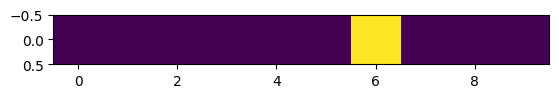

In [30]:
#calling the prediction function
predicted_image(22)

In [39]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

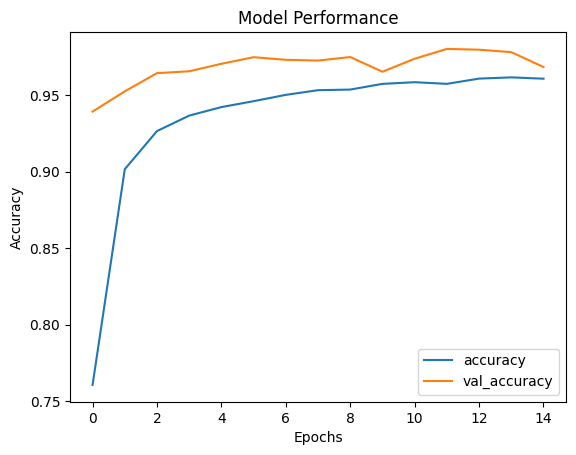

In [47]:
#Plotting the performing metrics on the training and testing accuracies
plt.plot(model.history.history['accuracy'],label="accuracy")
plt.plot(model.history.history['val_accuracy'],label="val_accuracy")
plt.title("Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

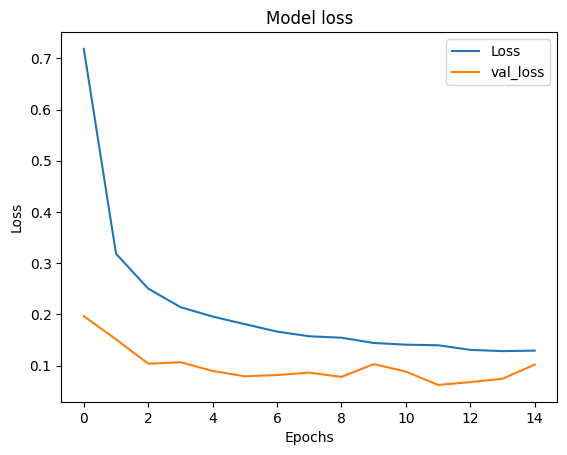

In [49]:
#Training and testing loss
plt.plot(model.history.history['loss'],label="Loss")
plt.plot(model.history.history['val_loss'],label="val_loss")
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [52]:
model.save('cnn_assignment_mnist_model.h5')

- The model has a better performace on the testing dataset